In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

In [26]:
cil = pd.read_csv('COALINDIA.csv')
cil.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7
0,11/4/2010,291.00,344.9,291.00,342.0,342.55,479716245,NaN
1,11/5/2010,343.00,356.5,343.00,348.3,349.85,31927173,NaN
2,11/8/2010,351.80,355.9,329.50,331.4,330.75,46932779,NaN
3,11/9/2010,330.15,333.4,325.00,325.4,326.05,23741956,NaN
4,11/10/2010,325.40,327.8,320.05,321.3,322.80,21057129,NaN


In [27]:
cil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2598 non-null   object 
 1   Open        2598 non-null   float64
 2   High        2598 non-null   float64
 3   Low         2598 non-null   float64
 4   Close       2598 non-null   float64
 5   Adj Close   2598 non-null   float64
 6   Volume      2598 non-null   int64  
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 162.5+ KB


In [28]:
cil['Date'] = pd.to_datetime(cil['Date'])

In [29]:
print(f'Dataframe contains stock prices between {cil.Date.min()} {cil.Date.max()}') 
print(f'Total days = {(cil.Date.max()  - cil.Date.min()).days} days')

Dataframe contains stock prices between 2010-11-04 00:00:00 2021-04-30 00:00:00
Total days = 3830 days


In [30]:
cil.describe()

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2.598000e+03,0.0
mean,288.234007,291.891744,284.240878,287.950943,287.953464,5.617118e+06,NaN
std,74.132769,75.064219,73.238459,74.098662,74.144478,1.105497e+07,NaN
min,110.850000,112.450000,109.550000,110.600000,110.550000,2.143700e+04,NaN
25%,254.737500,257.012500,251.187500,254.325000,254.087500,2.236566e+06,NaN
50%,300.100000,303.925000,295.950000,300.000000,299.950000,3.471441e+06,NaN
75%,341.200000,345.462500,336.137500,341.825000,341.637500,6.321588e+06,NaN
max,445.000000,447.100000,437.000000,443.900000,443.400000,4.797162e+08,NaN


<Axes: >

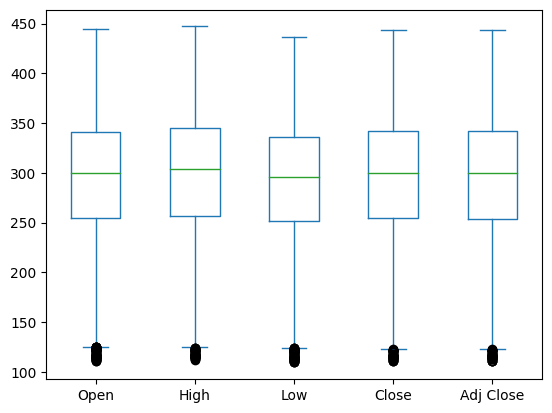

In [31]:
cil[['Open','High','Low','Close','Adj Close']].plot(kind='box')

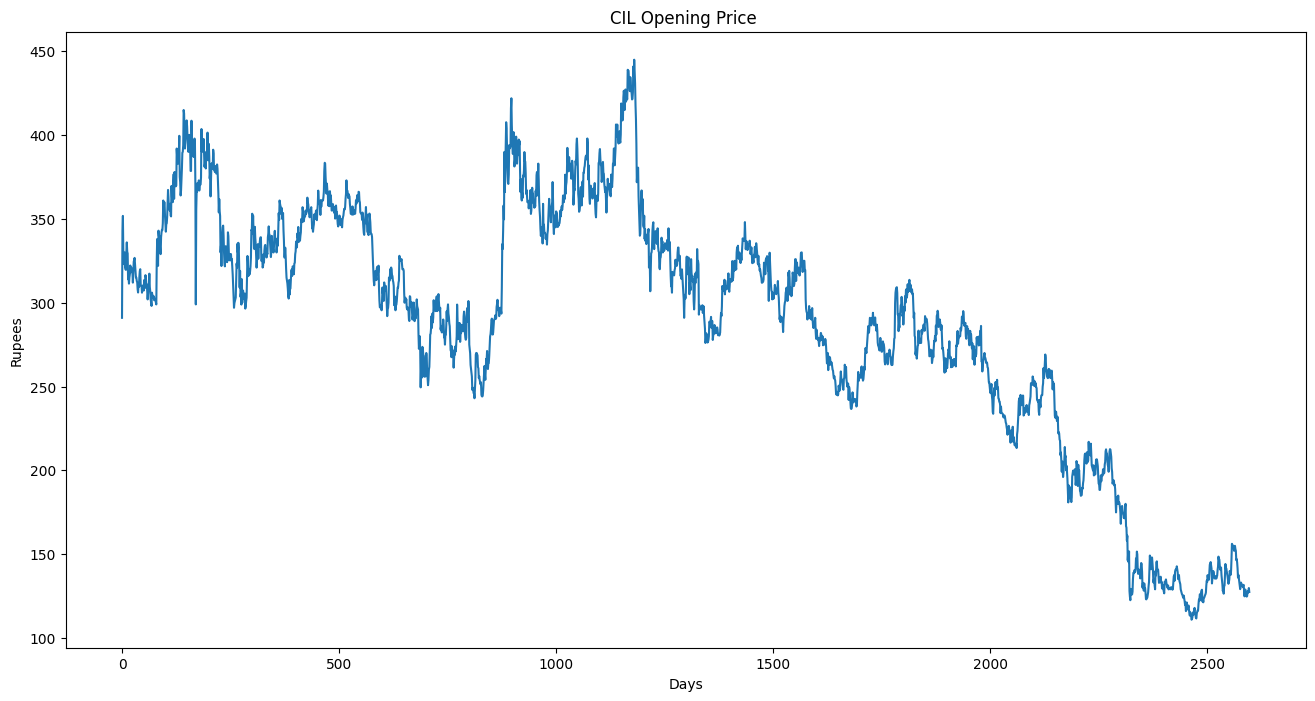

In [32]:
plt.figure(figsize=(16,8))
plt.title('CIL Opening Price ')
plt.xlabel('Days')
plt.ylabel('Rupees')
plt.plot(cil['Open'])
plt.show()

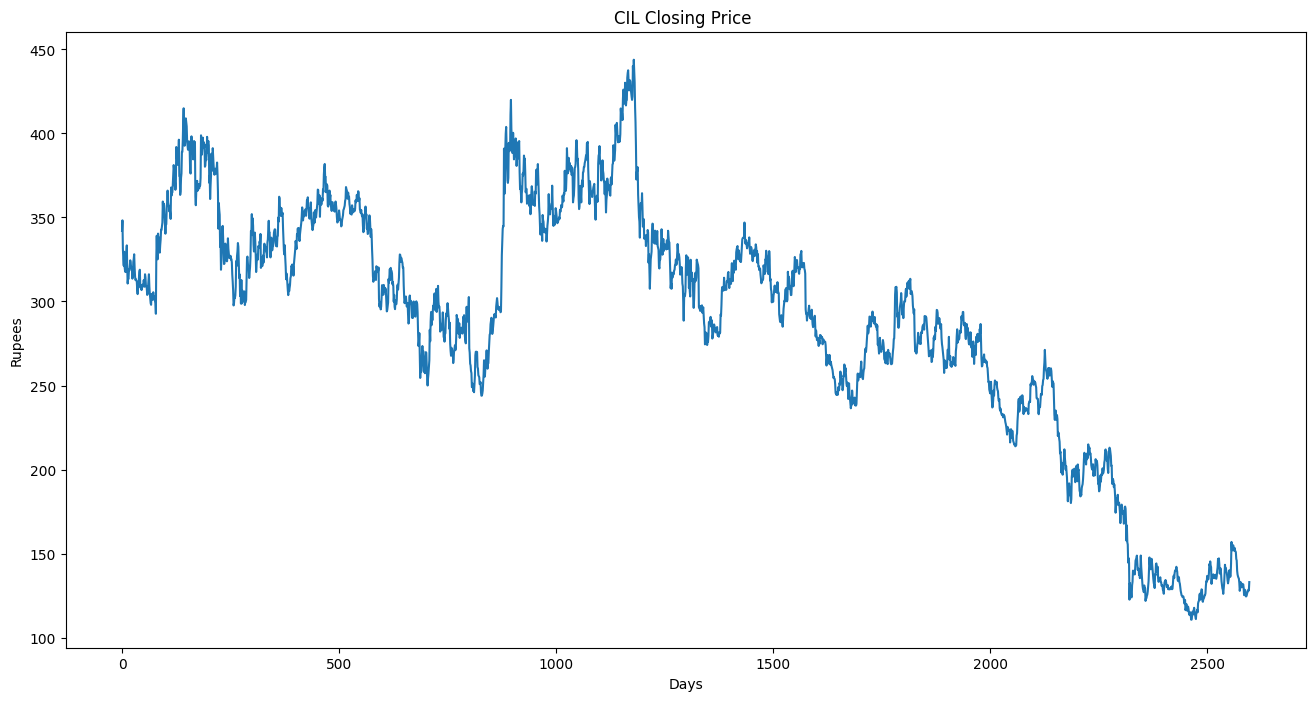

In [33]:
plt.figure(figsize=(16,8))
plt.title('CIL Closing Price ')
plt.xlabel('Days')
plt.ylabel('Rupees')
plt.plot(cil['Close'])
plt.show()

In [34]:
cil.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Unnamed: 7    2598
dtype: int64

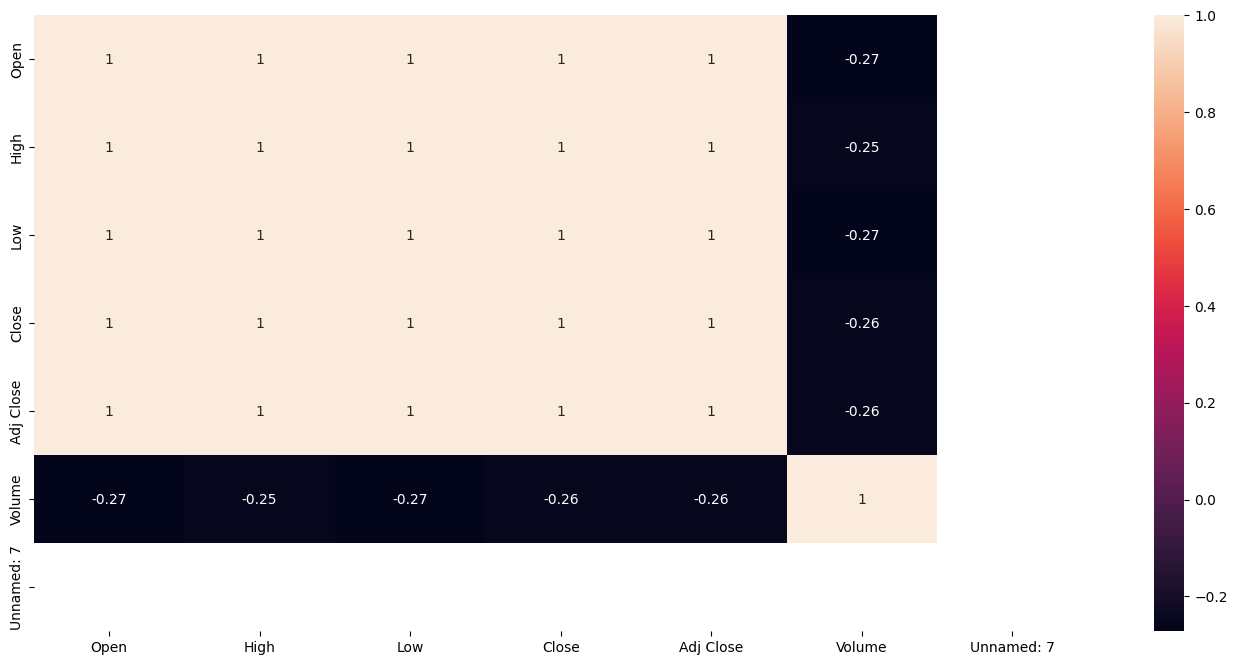

In [36]:
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(cil.corr(), annot = True)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)
clf = XGBRegressor() #XGBRegressor Model 
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
print(type(y_pred))
print(y_pred.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(520,)
<class 'pandas.core.frame.DataFrame'>
(520, 1)


In [51]:
pred= pd.DataFrame(y_pred)
pred.shape

(520, 1)

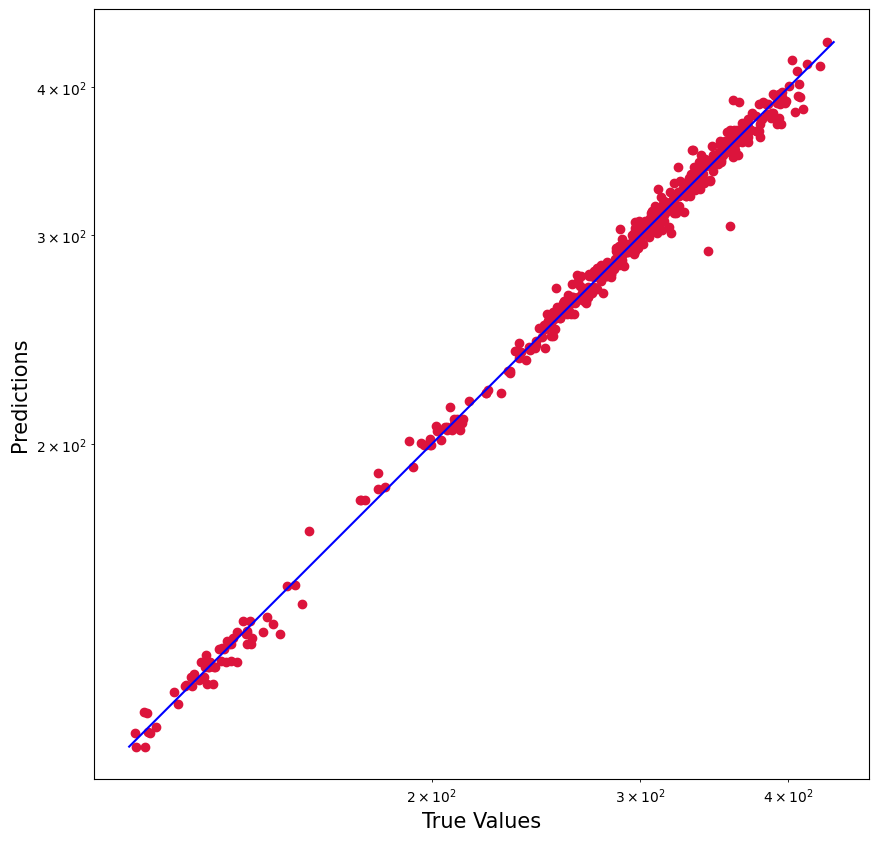

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred.values), max(y_test.values))
p2 = min(min(pred.values), min(y_test.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [53]:
test= y_test.to_numpy()
print(type(test))
print(test.shape)
y_pred=y_pred.reshape(-1,1)
print(y_pred.shape)

<class 'numpy.ndarray'>
(520, 1)
(520, 1)


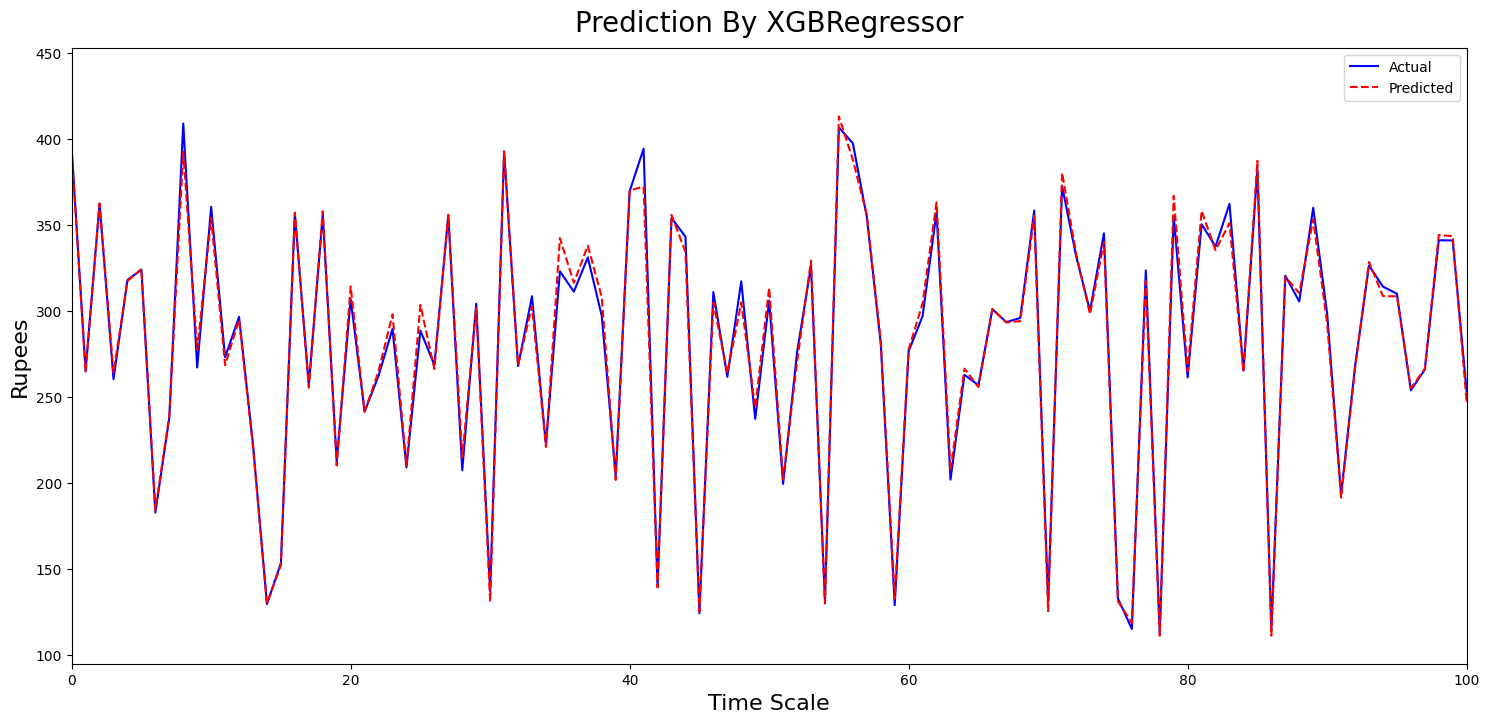

In [54]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(test, color='blue', label='Data 1')
ax.plot(y_pred, color='red', label='Data 2',linestyle="dashed")

plt.xlabel("Time Scale", fontdict={'fontsize':16})
plt.ylabel("Rupees", fontdict={'fontsize':16})
plt.title("Prediction By XGBRegressor", fontdict={'fontsize':20}, pad=12)

ax.legend(["Actual","Predicted"])
plt.xlim(0,100) 

plt.show()

#R-Squared(Coefficient of determination)

In [55]:
clf.score(x_test,y_test)

0.9914460322104881

#MSE(mean squared error)

In [58]:
errors = mean_squared_error(y_test, y_pred)
print(errors)

45.08709857967477


#RMSE(root mean squared error)

In [59]:
errors = mean_squared_error(y_test, y_pred,squared=False)
print(errors)

6.714692739036893


In [60]:
kf = KFold(n_splits=10,shuffle=True,random_state=7)
reg = LinearRegression()
cv_results =cross_val_score(reg,x,y,cv=kf)

In [61]:
print(cv_results)

[0.99260867 0.99257633 0.996027   0.99572996 0.99567335 0.99549199
 0.99521595 0.99422789 0.99509505 0.99489227]


In [62]:
print(np.mean(cv_results), np.std(cv_results))

0.9947538455691098 0.001180387502480156


In [63]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.99258361 0.99596017]


In [64]:
kf1 = KFold(n_splits=10,shuffle=True,random_state=7)
cv_results1 =cross_val_score(clf,x,y,cv=kf)

In [66]:
print(cv_results1)

[0.99191106 0.99148418 0.99412024 0.99474571 0.99507935 0.99457069
 0.99437228 0.99311345 0.9933979  0.9924175 ]


In [67]:
print(np.mean(cv_results1), np.std(cv_results1))

0.993521236552063 0.0011938807739283628


In [68]:
print(np.quantile(cv_results1,[0.025,0.975]))

[0.99158023 0.99500428]


In [14]:
import dash as dcc,html
from dash.dependencies import Input, Output 

In [48]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Coal India Limited',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

cil_data = [{'x':cil['Date'], 'y':cil['Close']}]
plot = go.Figure(data=cil_data, layout=layout)

In [11]:
plot.show()

In [69]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [70]:
#Split the data into train and test sets
X = np.array(cil.index).reshape(-1,1)
Y = cil['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [71]:
scaler = StandardScaler().fit(X_train)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [74]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [75]:
iplot(plot2)

In [76]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6047560343951172	0.6229738088748404
MSE       2157.1951084670654	2089.902111483963

